# Lecture 5: Training I

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2019-01-06 16:39:26


# Linear regression

## Linear regression mode (scalar form)

$$\hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$

- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_j$ is the $j$th feature, for $j=0,1,...,n$.
- $\theta_j$ is the $j$th model parameter
<br>(with bias $\theta_0$ and feature weights $\theta_1, ..., \theta_n)$.

## Linear regression mode (vector form)

$$\hat{y} =\theta^{\rm T} x = h_\theta(x)$$

- $x$ is the instance feature vector $x=(x_0, x_1, ... x_n)^{\rm T}$, where $x_0 = 1$.
- $\theta$ is the vector of model parameters $\theta=(\theta_0, \theta_1, ... \theta_n)^{\rm T}$.
- $\cdot^{\rm T}$ denotes transpose.
- $h_\theta(x)$ is the hypothesis function, with parameters $\theta$.

## Train linear regression

Give training data $\{ x^{(i)}, y^{(i)} \}$, for $m$ instances $i=1,2,...,m$.

Minimise mean square error (MSE):
$$\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left(\theta^{\rm T} x^{(i)} - y^{(i)}\right)^2 .$$

### Concise matrix-vector notation

Recall:
- $x_j^{(i)}$ is (scalar) value of feature $j$ in $i$th training example.
- $x^{(i)}$ is the (column) vector of features of the $i$th training example.
- $y^{(i)}$ is the (scalar) value of target of the $i$th training example.
- $n$ features and $m$ training instances

Define:
- Feature matrix: $X_{m \times n} = [ x^{(1)},\ x^{(2)},\ ...,\ x^{(m)}]^{\rm T}$.
- Target vector: $y_{m \times 1} = [ y^{(1)},\ y^{(2)},\ ...,\ y^{(m)}]^{\rm T}$.

### Recall features matrix and target vector

<center><img src="Lecture05_Images/data-layout.png" alt="data-layout" style="height: 400px;"/></center>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]

Minimising the MSE is equivalent to minimising the cost function

$$C(\theta) = \frac{1}{m} (X \theta - y)^{\rm T}(X \theta - y),$$

where for notational convenience we denote the dependence on $\theta$ only and consider $X$ and $y$ fixed.

# Normal equations

Minimise the cost function analytically 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Solution given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

## Example of solving normal equations

In [2]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

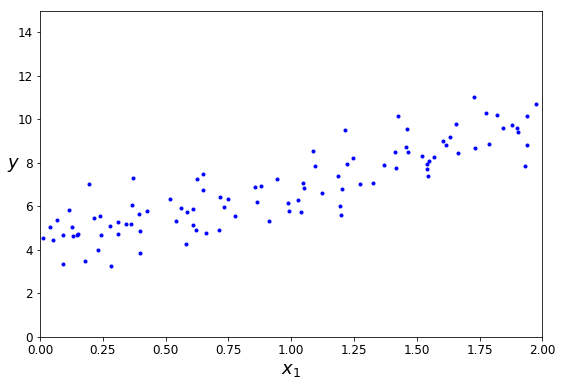

In [3]:
import numpy as np
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
plt.figure(figsize=(9,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

### Exercise: Solve normal equations.

In [4]:
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

### Exercise: Make predictions using the fitted model for $x_1 = 0$ and $x_1 = 2$.

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

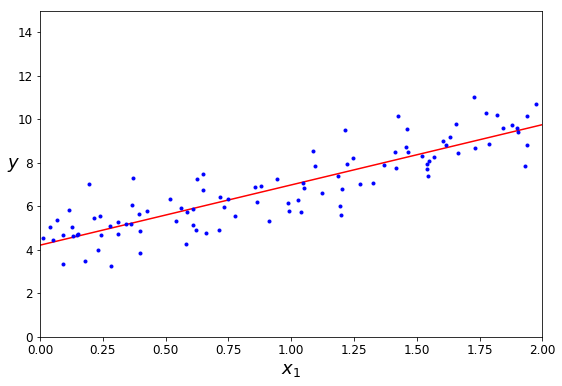

In [6]:
plt.figure(figsize=(9,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

## Solve using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Computational complexity

Solving the normal equation requires inverting $X^{\rm T} X$, which is an $n \times n$ matrix (where $n$ is the number of features).

Inverting an $n \times n$ matrix is naively of complexity $\mathcal{O}(n^3)$ ($\mathcal{O}(n^{2.4})$ if certain fast algorithms are used).

Also, typically requires all training instances to be held in memory at once.

Other methods are required to handle large data-sets, i.e. when considering large numbers of features and large numbers of training instances.

# Batch gradient descent

<center><img src="Lecture05_Images/optimization_gd.png" style="width: 400px;"/></center>

[[Image source](http://www.holehouse.org/mlclass)]

Gradient of the cost function is given by
$$ \frac{\partial}{\partial \theta} C(\theta)
=\frac{2}{m} X^{\rm T}  \left( X \theta - y \right) 
= \left[\frac{\partial C}{\partial \theta_0},\ \frac{\partial C}{\partial \theta_1},\ ...,\ \frac{\partial C}{\partial \theta_n} \right]^{\rm T} 
.
$$

Batch gradient descent algorithm defined by taking a step $\alpha$ in the direction of the gradient:

$$\theta^{(t)} = \theta^{(t-1)} - \alpha  \frac{\partial C}{\partial \theta},$$

where $t$ denotes the iteration number.

This algorithm is called *batch* gradient descent since it uses the full *batch* of training data ($X$) at each iteration.  We will see other forms of gradient descent soon...

### Exercise: Implement gradient descent

Implement gradient descent to estimate the parameters of the linear regression model considered before.

Consider 1000 steps and $\alpha=0.1$, starting from $\theta^{(0)}=[1, 1]^{\rm T}$.

In [9]:
n_iterations = 1000
alpha = 0.1
theta_i = np.array([[1], [1]])
for i in range(n_iterations):
    theta_i = theta_i - alpha *  2/m * X_b.T.dot(X_b.dot(theta_i)-y)
theta_i

array([[4.21509616],
       [2.77011339]])

The solution found is very similar to that found by solving the normal equation.

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

# Learning rate

The step size $\alpha$ is also called the *learning rate*.

## Good learning rate

<center><img src="Lecture05_Images/bgd_alpha_good.png" alt="data-layout" style="height: 400px;"/></center>

[Source: Geron]

## Learning rate too small 

Convergence will be slow.

<center><img src="Lecture05_Images/bgd_alpha_small.png" alt="data-layout" style="height: 400px;"/></center>

[Source: Geron]


## Learning rate too large 

May not converge.

<center><img src="Lecture05_Images/bgd_alpha_large.png" alt="data-layout" style="height: 400px;"/></center>

[Source: Geron]


## Evolution of fitted curve 

Consider the evolution of the curve corresponding to the best fit parameters for the first 10 iterations for different learning rates $\alpha$.

In [11]:
theta_path_bgd = []

def plot_gradient_descent(theta, alpha, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

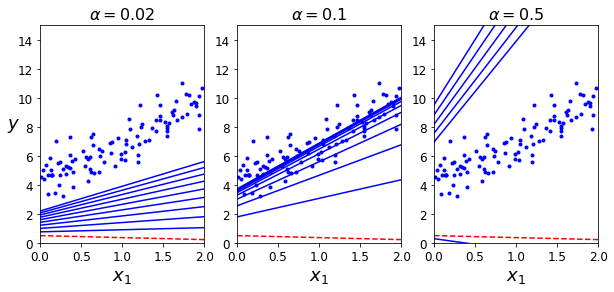

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, alpha=0.1)
plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)

- $\alpha=0.02$: learning rate is too small and will take a long time to reach the global optimum.
- $\alpha=0.1$: learning rate is good and global optimum will be found quickly.
- $\alpha=0.5$: learning rate is too large and parameters jump about (may not converge).

# Convergence

Cost function may not be nice with a single local minimum that coincides with the global minimum.

<center><img src="Lecture05_Images/bgd_pitfalls.png" alt="data-layout" style="height: 300px;"/></center>

[Source: Geron]

## Convex objective function

MSE cost function for linear regression is convex (for any two points on the curve, the line segment connecting those points lies above the curve).

Consequently, the cost function has a single local minimum (that therefore coincides with the global minimum).

Furthermore, the cost function is smooth with a slope that never changes abruptly (i.e. it is Lipschitz continuous).  

Gradient descent is therefore guaranteed to converge to the global minimum.

# Feature scaling


For gradient descent to work well it is critical for all features to have a similar scale.

<center><img src="Lecture05_Images/bgd_feature_scaling.png" alt="data-layout" style="height: 200px;"/></center>

[Source: Geron]

In the case on the left, the features have the same scale and even intially the solution moves towards the minimum, thus reaching it quickly.

In the case on the right, the features have different scales and initially the solution does not move directly towards the minimum.  Convergence is therefore slow.

## Feature scaling methods

In general should make sure features have a similar scale since many machine learning methods do not work well when numerical attributes have very different scales.

- Min-max scaling: 
$$x_j \rightarrow \frac{x_j - \min_i x_i}{\max_i x_i - \min_i x_i}$$
See Scikit-Learn [`MinMaxScalar`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


- Standardization: 
$$x_j \rightarrow \frac{x_j - \mu_j}{\sigma_j},$$
where $\mu_j$ and $\sigma_j$ are the mean and standard deviation of feature $j$ computed from the training instances.
See Scikit-Learn [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
